<a href="https://colab.research.google.com/github/sassysoul/The-Spark-Foundation/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP : THE SPARK FOUNDATION**

**DATA SCIENCE AND BUSINESS ANALYTIC INTERN**


**AUTHOR : SHAKSHI KUMARI**


**TASK 1: PREDICTION USING SUPERVISED ML**

In this task we have to predict the score of a student based on the hours studied.The task has two variables i.e. Numbers of hours studied and score obtained. This can be used using Linear Regression.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data from remote url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


In [5]:
#Exploring Data
print(data.shape)
data.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


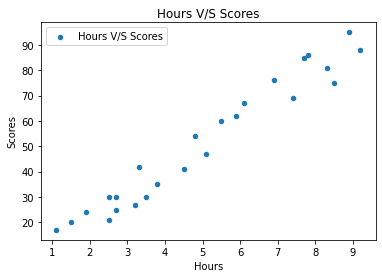

In [12]:
data.plot(kind = "scatter",x = "Hours", y = "Scores", label = "Hours V/S Scores");
plt.title("Hours V/S Scores")
plt.show()

In [14]:
data.corr(method = "pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
data.corr(method = "spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [17]:
hours = data["Hours"]
scores = data["Scores"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


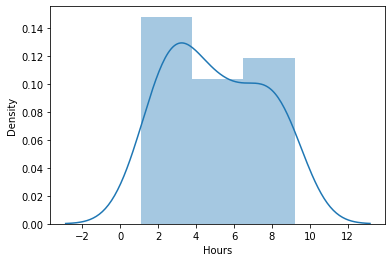

In [18]:
sns.distplot(hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


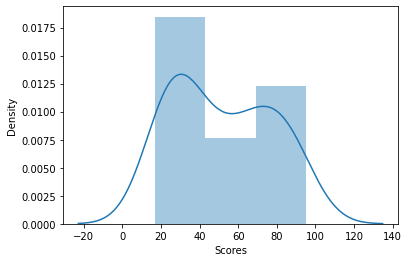

In [19]:
sns.distplot(scores)

# **LINEAR REGRESSION**

In [21]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

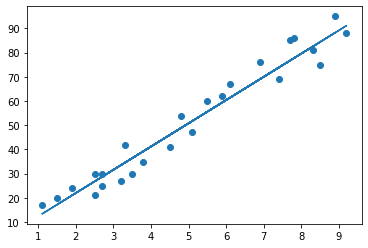

In [25]:
m = reg.coef_
c = reg.intercept_
line = m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [26]:
y_pred = reg.predict(X_test)

In [27]:
actual_predicted = pd.DataFrame({"Target":y_test,"Predicted":y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


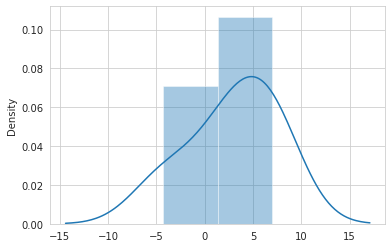

In [29]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

**So, now we will predict the score of the student who studies for 9.25 hours**

In [31]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies for {} hrs per day then he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hrs per day then he/she will score [91.56986604] % in exam.


# **Model Evaluation**

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
